In [2]:
import submitit
import os
import glob
import numpy as np
import pandas as pd
import mne
import submitit
import mne
import numpy as np
from tensorpac import Pac
import matplotlib.pyplot as plt
import os
import urllib
import pandas as pd
import numpy as np
from scipy.io import loadmat

from tensorpac import Pac, EventRelatedPac, PreferredPhase
from tensorpac.utils import PeakLockedTF, PSD, ITC, BinAmplitude


Reading /mnt/data/AdaptiveControl/IBLrawdata/pid_data/febb430e-2d50-4f83-87a0-b5ffbb9a4943/lfp_febb430e-2d50-4f83-87a0-b5ffbb9a4943_epoched.fif ...


Isotrak not found
    Found the data of interest:
        t =   -1000.00 ...    2000.00 ms
        0 CTF compensation matrices available


/tmp/ipykernel_222607/1100010719.py:10: RuntimeWarning: This filename (/mnt/data/AdaptiveControl/IBLrawdata/pid_data/febb430e-2d50-4f83-87a0-b5ffbb9a4943/lfp_febb430e-2d50-4f83-87a0-b5ffbb9a4943_epoched.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epoch_path, preload=True)


Adding metadata with 16 columns
402 matching events found
No baseline correction applied
0 projection items activated
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


/tmp/ipykernel_222607/1100010719.py:25: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data = epoch.get_data().squeeze()
Phase Amplitude Coupling object defined
    extract phases (n_pha=55) and amplitudes (n_amps=35)
    true PAC estimation using Gaussian Copula PAC (gcPac)
    compute surrogates (Swap amplitude time blocks (Bahramisharif et al. 2013), 100 permutations, random_state=0)
WARNING | For inferences at p<0.05, it is recommended to perform at least n_perm=200 permutations
    infer p-values at (p=0.05, mcp=fdr)
    normalize true PAC estimation by surrogates (Substract the mean of surrogates)
WARNING | 3d pac array has been given as an input. Only 2d arrays are supported for plotting. Taking the mean across the last dimension


<Axes: title={'center': 'after stim '}, xlabel='Frequency for phase (hz)', ylabel='Frequency for amplitude (hz)'>

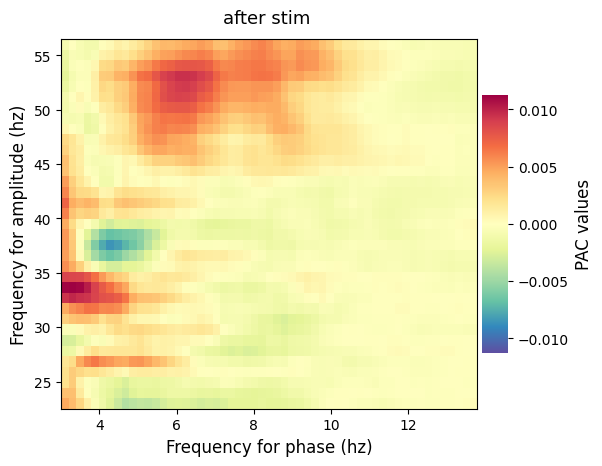

In [3]:
pid = 'febb430e-2d50-4f83-87a0-b5ffbb9a4943'
n_jobs = 10
epoch_path = f'/mnt/data/AdaptiveControl/IBLrawdata/pid_data/{pid}/lfp_{pid}_epoched.fif'



# Load metadata

# Load the epochs
epochs = mne.read_epochs(epoch_path, preload=True)
times = epochs.times
sf = epochs.info['sfreq']
meta = epochs.metadata.reset_index()
for i, ch in enumerate(epochs.ch_names):
    
    if i > 0:
        
        continue
        

    epoch = epochs.copy().pick_channels([ch])

    
    # Extract data from epochs
    data = epoch.get_data().squeeze() 

data = data[0:500, 500:1000]


p = Pac(idpac=(6, 2, 1), f_pha=(2, 15, 2, .2), f_amp=(20, 60, 5, 1))
# compute true pac and surrogates
n_perm = 60  # number of permutations
xpac = p.filterfit(sf, data, n_perm=100, n_jobs= n_jobs, mcp= 'fdr',
                   random_state=0).squeeze()
p.comodulogram(xpac, cmap='Spectral_r' , title = f'after stim ')


Reading /mnt/data/AdaptiveControl/IBLrawdata/pid_data/febb430e-2d50-4f83-87a0-b5ffbb9a4943/lfp_febb430e-2d50-4f83-87a0-b5ffbb9a4943_epoched.fif ...
Isotrak not found
    Found the data of interest:
        t =   -1000.00 ...    2000.00 ms
        0 CTF compensation matrices available


/tmp/ipykernel_222607/1271300034.py:10: RuntimeWarning: This filename (/mnt/data/AdaptiveControl/IBLrawdata/pid_data/febb430e-2d50-4f83-87a0-b5ffbb9a4943/lfp_febb430e-2d50-4f83-87a0-b5ffbb9a4943_epoched.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epoch_path, preload=True)


Adding metadata with 16 columns
402 matching events found
No baseline correction applied
0 projection items activated
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


/tmp/ipykernel_222607/1271300034.py:25: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data = epoch.get_data().squeeze()
Phase Amplitude Coupling object defined
    extract phases (n_pha=55) and amplitudes (n_amps=35)
    true PAC estimation using Gaussian Copula PAC (gcPac)
    compute surrogates (Swap amplitude time blocks (Bahramisharif et al. 2013), 100 permutations, random_state=0)
WARNING | For inferences at p<0.05, it is recommended to perform at least n_perm=200 permutations
    infer p-values at (p=0.05, mcp=fdr)
    normalize true PAC estimation by surrogates (Substract the mean of surrogates)
WARNING | 3d pac array has been given as an input. Only 2d arrays are supported for plotting. Taking the mean across the last dimension


<Axes: title={'center': 'after stim '}, xlabel='Frequency for phase (hz)', ylabel='Frequency for amplitude (hz)'>

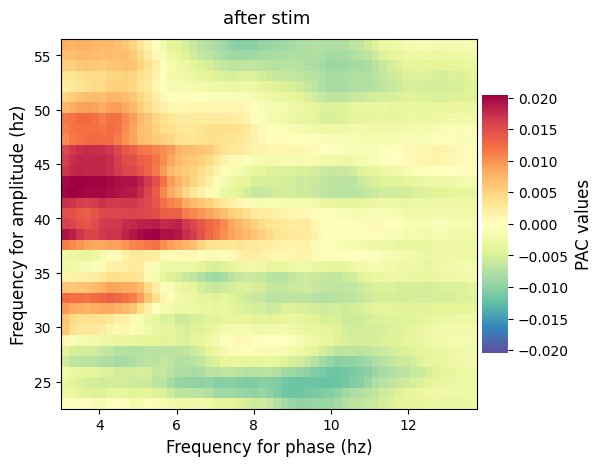

In [4]:
pid = 'febb430e-2d50-4f83-87a0-b5ffbb9a4943'
n_jobs = 10
epoch_path = f'/mnt/data/AdaptiveControl/IBLrawdata/pid_data/{pid}/lfp_{pid}_epoched.fif'



# Load metadata

# Load the epochs
epochs = mne.read_epochs(epoch_path, preload=True)
times = epochs.times
sf = epochs.info['sfreq']
meta = epochs.metadata.reset_index()
for i, ch in enumerate(epochs.ch_names):
    
    if i > 0:
        
        continue
        

    epoch = epochs.copy().pick_channels([ch])

    
    # Extract data from epochs
    data = epoch.get_data().squeeze() 

data = data[0:500, 250:500]

p = Pac(idpac=(6, 2, 1), f_pha=(2, 15, 2, .2), f_amp=(20, 60, 5, 1))
# compute true pac and surrogates
n_perm = 60  # number of permutations
xpac = p.filterfit(sf, data, n_perm=100, n_jobs= n_jobs, mcp= 'fdr',
                   random_state=0).squeeze()
p.comodulogram(xpac, cmap='Spectral_r' , title = f'after stim ')

In [64]:
from textwrap import wrap
def dummy():

    pid = 'febb430e-2d50-4f83-87a0-b5ffbb9a4943'
    ch = 'VISp4_382'

    epoch_path = f'/mnt/data/AdaptiveControl/IBLrawdata/pid_data/{pid}/lfp_{pid}_epoched.fif'

    # Load the epochs
    epochs = mne.read_epochs(epoch_path, preload=True)
    sf = epochs.info['sfreq']
    epoch = epochs.copy().pick_channels([ch])
    data = epoch.get_data().squeeze() 
    data = data[:, 500:1000]
    # define the pac object
    p = Pac(f_pha='mres', f_amp=(30, 120, 5, 1))
    # Now, we want to compare PAC methods, hence it's useless to systematically
    # filter the data. So we extract the phase and the amplitude only once
    phases = p.filter(sf, data, ftype='phase', n_jobs=20) 
    amplitudes = p.filter(sf, data, ftype='amplitude', n_jobs=20)

    plt.figure(figsize=(14, 8))
    for i, k in enumerate(range(5)):
        # switch the normalization method
        p.idpac = (6, 2, k)
        print('-> Normalization using ' + p.str_norm)
        # compute pac and surrogates (n_perm)
        xpac = p.fit(phases, amplitudes, n_perm=250)
        # plot
        plt.subplot(2, 3, k + 1)
        title = '\n'.join(wrap(f"{p.str_norm} ({k})", 40))
        p.comodulogram(xpac.mean(-1), title=title, cmap='plasma', vmin=0.)

    plt.tight_layout()
    plt.savefig('normalization_methods.png')
    
executor = submitit.AutoExecutor(folder="logs")
executor.update_parameters(mem_gb=20, timeout_min=600, slurm_partition="CPU", cpus_per_task=20)
jobs = executor.submit(dummy)  

WARNING | 3d pac array has been given as an input. Only 2d arrays are supported for plotting. Taking the mean across the last dimension


<Axes: xlabel='Frequency for phase (hz)', ylabel='Frequency for amplitude (hz)'>

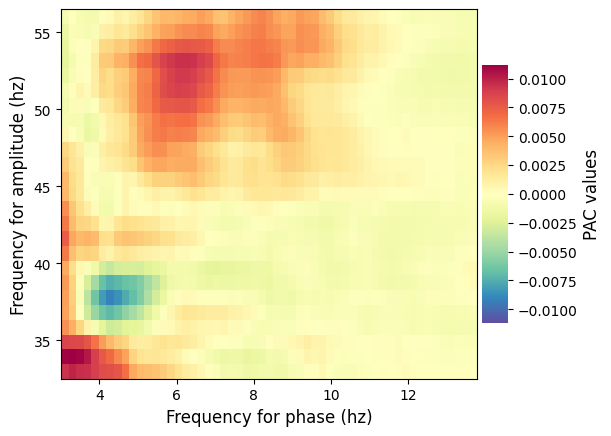

In [58]:
p.comodulogram(xpac, cmap='Spectral_r')